In [44]:
import pandas as pd
pd.set_option('display.max_columns', None)
import pickle
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Statistics
#!pip install statsmodels# - we may need to pip stall statsmodels but should be in the requirements section
from statsmodels.graphics.gofplots import qqplot

# import the python files
import get_data


In [7]:
all_df = get_data.get_data()
all_df = all_df.drop_duplicates()
all_df.head()

,property_id,hub_id,zone,id,type,occupied,heating_system,heating_system_manufacturer,heating_system_model_no,number_of_zones,occurred,number_of_paired_sensors,lodgement_date,current_energy_efficiency,property_type,built_form,floor_description,windows_description,walls_description,roof_description,number_habitable_rooms,number_heated_rooms,total_floor_area,context_date,reported_hlr,reported_tth,total_daily_sensor_readings,daily_avg_room_humidty,daily_avg_room_temperature,daily_avg_weather_temperature,daily_max_target_temperature,daily_total_delta_energy_meter_use,daily_total_heating_use,reported_fuel_poverty_percentage,daily_temp_below18c_total_sensor_readings,hub_type
0,20222,20128.0,1.0,20891.0,255,True,HEAT_PUMP_GSHP,KENSA,Shoebox,1,04/09/23 15:22,NaN,02/03/21 00:00,46,Flat,Detached,Average thermal transmittance 1.20 W/m-¦K,Fully double glazed,Average thermal transmittance 0.70 W/m-¦K,(other premises above),NaN,NaN,35.0,14/08/20 00:00,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,20222,20128.0,1.0,20891.0,255,True,HEAT_PUMP_GSHP,KENSA,Shoebox,1,04/09/23 15:22,NaN,02/03/21 00:00,46,Flat,Detached,Average thermal transmittance 1.20 W/m-¦K,Fully double glazed,Average thermal transmittance 0.70 W/m-¦K,(other premises above),NaN,NaN,35.0,02/08/20 00:00,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,20222,20128.0,1.0,20891.0,255,True,HEAT_PUMP_GSHP,KENSA,Shoebox,1,04/09/23 15:22,NaN,02/03/21 00:00,46,Flat,Detached,Average thermal transmittance 1.20 W/m-¦K,Fully double glazed,Average thermal transmittance 0.70 W/m-¦K,(other premises above),NaN,NaN,35.0,17/08/20 00:00,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,20222,20128.0,1.0,20891.0,255,True,HEAT_PUMP_GSHP,KENSA,Shoebox,1,04/09/23 15:22,NaN,02/03/21 00:00,46,Flat,Detached,Average thermal transmittance 1.20 W/m-¦K,Fully double glazed,Average thermal transmittance 0.70 W/m-¦K,(other premises above),NaN,NaN,35.0,06/08/20 00:00,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,20222,20128.0,1.0,20891.0,255,True,HEAT_PUMP_GSHP,KENSA,Shoebox,1,04/09/23 15:22,NaN,02/03/21 00:00,46,Flat,Detached,Average thermal transmittance 1.20 W/m-¦K,Fully double glazed,Average thermal transmittance 0.70 W/m-¦K,(other premises above),NaN,NaN,35.0,16/08/20 00:00,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [8]:
all_df = all_df[['property_id','hub_id','zone', 'context_date', 'total_daily_sensor_readings']]

In [9]:
all_df.head()

,property_id,hub_id,zone,context_date,total_daily_sensor_readings
0,20222,20128.0,1.0,14/08/20 00:00,0
1,20222,20128.0,1.0,02/08/20 00:00,0
2,20222,20128.0,1.0,17/08/20 00:00,0
3,20222,20128.0,1.0,06/08/20 00:00,0
4,20222,20128.0,1.0,16/08/20 00:00,0


In [10]:
date_format = '%d/%m/%y %H:%M'

all_df['context_date'] = all_df['context_date'].apply(lambda x: datetime.datetime.strptime(x, date_format))

In [11]:
# Define the months to exclude
exclude_months = [5, 6, 7, 8] 
include_years = [2020,2021,2022]

filter_df = all_df[~all_df['context_date'].dt.month.isin(exclude_months)]
filter_df = filter_df[filter_df['context_date'].dt.year.isin(include_years)]

In [12]:
print(len(all_df))
print(len(filter_df))

467518
254498


In [13]:
filter_df_sens = filter_df[filter_df['total_daily_sensor_readings']>= 120]
filter_df_sens = filter_df_sens.drop_duplicates()
print(len(filter_df_sens))

36029


In [14]:
print(len(filter_df_sens['property_id'].unique().tolist()))

86


In [15]:
filter_df_sens_copy= filter_df_sens.copy()
filter_df_sens.head()


,property_id,hub_id,zone,context_date,total_daily_sensor_readings
40,20222,20128.0,1.0,2020-12-01,141
74,20222,20128.0,1.0,2021-09-28,142
81,20222,20128.0,1.0,2020-11-29,141
83,20222,20128.0,1.0,2020-12-26,141
97,20222,20128.0,1.0,2020-12-27,141


In [16]:
# Use pivot to reshape the dataframe
df = filter_df_sens.copy()

wide_df = df.pivot(index='context_date', columns='property_id', values='total_daily_sensor_readings')

# Reset the index to make 'context_date' a column
wide_df = wide_df.reset_index()

wide_df.head()

property_id,context_date,20083,20084,20101,20112,20115,20118,20130,20137,20154,20160,20180,20187,20192,20218,20220,20222,20223,20238,20240,20246,20249,20250,20251,20252,20255,20262,20267,20268,20272,20273,20276,20277,20281,20288,20293,20300,20301,20307,20309,20312,20313,20316,20319,20321,20322,20330,20344,20357,20359,20360,20361,20372,20374,20376,20377,20378,20380,20383,20387,20388,20397,20398,20399,20403,20408,20419,20422,20425,20427,20429,20436,20446,20449,20454,20456,20457,20528,20529,20530,20534,20680,20959,21127,22552,23394,23838
0,2020-10-10,143.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-11,143.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-10-12,141.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-10-13,143.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-10-14,136.0,134.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
wide_df_col_list= list(wide_df.columns)

In [23]:
wide_df_one = wide_df.applymap(lambda x: 1 if type(x)==float and x==x else x).fillna(0)

In [24]:
wide_df_one.columns

Index(['context_date',          20083,          20084,          20101,
                20112,          20115,          20118,          20130,
                20137,          20154,          20160,          20180,
                20187,          20192,          20218,          20220,
                20222,          20223,          20238,          20240,
                20246,          20249,          20250,          20251,
                20252,          20255,          20262,          20267,
                20268,          20272,          20273,          20276,
                20277,          20281,          20288,          20293,
                20300,          20301,          20307,          20309,
                20312,          20313,          20316,          20319,
                20321,          20322,          20330,          20344,
                20357,          20359,          20360,          20361,
                20372,          20374,          20376,          20377,
      

In [29]:
wide_df_one['row_sum'] = wide_df_one.drop('context_date',axis=1).sum(axis=1)


In [27]:
wide_df_one['context_date']

0     2020-10-10
1     2020-10-11
2     2020-10-12
3     2020-10-13
4     2020-10-14
         ...    
562   2022-12-27
563   2022-12-28
564   2022-12-29
565   2022-12-30
566   2022-12-31
Name: context_date, Length: 567, dtype: datetime64[ns]

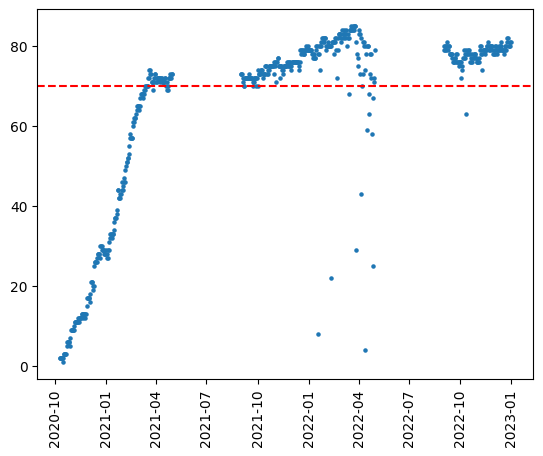

In [30]:
x = wide_df_one['context_date']
x = [d.date() for d in x]
y = wide_df_one['row_sum']
plt.scatter(x=x ,y=y, s = 5)

plt.xticks(rotation=90)
plt.axhline(y=70, color='red', linestyle='--')

In [33]:
dict_sum_days = {p : wide_df_one[p].sum() for p in wide_df_col_list[1:]}

In [34]:


def create_set_column(df):
    # Iterate over each row in the dataframe
    for index, row in df.iterrows():
        # Create an empty set for each row
        row_set = set()
        # Iterate over each column in the row
        for column in df.columns:
            # Check if the value in the row is 1
            if row[column] == 1:
                # Add the value to the set
                row_set.add(column)
        # Assign the set to the 'set_column' in the row
        df.at[index, 'set_column'] = row_set
    return df


In [35]:
wide_df_one['set_column'] = None
wide_df_one = create_set_column(wide_df_one)

In [36]:
wide_df_sub = wide_df_one[wide_df_one['context_date']> datetime.datetime(2021,9,1,0,0,0)]
wide_df_sub = wide_df_sub[wide_df_sub['context_date'] < datetime.datetime(2022,1,15,0,0,0)]

In [37]:
list_of_sets = wide_df_sub['set_column']

In [38]:
wide_df_sub = wide_df_one[wide_df_one['context_date']> datetime.datetime(2021,9,1,0,0,0)]
wide_df_sub = wide_df_sub[wide_df_sub['context_date'] < datetime.datetime(2022,1,15,0,0,0)]
list_of_sets = wide_df_sub['set_column']
def find_common_elements(set_list):
    common_elements = set.intersection(*set_list)
    return common_elements



common_set = find_common_elements(list_of_sets)
print(len(common_set))

44


In [39]:
common_set_list = list(common_set)
df_tentative = filter_df_sens[filter_df_sens['property_id'].isin(common_set_list)]

In [40]:
common_set_list

[20101,
 20359,
 20238,
 20112,
 20240,
 20115,
 20372,
 20249,
 20377,
 20378,
 20252,
 20380,
 20255,
 20130,
 20267,
 20268,
 20399,
 20272,
 20273,
 20530,
 20403,
 20276,
 20277,
 20534,
 20408,
 20281,
 20160,
 20419,
 20427,
 20429,
 20180,
 20309,
 20312,
 20187,
 20446,
 20319,
 20449,
 20457,
 20083,
 20344,
 20218,
 20220,
 20222,
 20223]

In [41]:
unique_dates  = df_tentative['context_date'].unique().tolist()

In [42]:
wide_df_sub_2 = wide_df_one[wide_df_one['context_date']> datetime.datetime(2022,11,1,0,0,0)]
wide_df_sub_2 = wide_df_sub_2[wide_df_sub_2['context_date'] < datetime.datetime(2022,12,31,0,0,0)]

second_common_set = find_common_elements(wide_df_sub_2['set_column'].tolist())

In [43]:
final_common_set = find_common_elements([common_set, second_common_set])

In [ ]:
###This set appears to have full-time use between September 2021 and 15th Jan 2022 and then agian from 1st November 2022 to 31st December 2023

print(sorted(final_common_set))

[20083, 20101, 20112, 20160, 20180, 20187, 20218, 20220, 20238, 20249, 20255, 20267, 20268, 20272, 20273, 20276, 20277, 20281, 20309, 20312, 20319, 20344, 20359, 20377, 20380, 20399, 20403, 20408, 20427, 20429, 20446, 20457, 20534]


In [49]:
import os
os.chdir('../raw_data/')
pickle.dump(common_set_list, open('set_properties_running_Sep2022_Jan2023.pkl','wb'))
